In [19]:
import numpy as np
import pandas as pd

pd.options.display.max_columns = None
pd.options.display.max_rows = None

from matplotlib import pyplot as plt
import seaborn as sns


In [20]:
df_2022 = pd.read_csv("../data/2022-23_reg_season_clean.csv")
df_2023 = pd.read_csv("../data/2023-24_reg_season_clean.csv")


# main df
df = df_2023.copy()

# convert to date type
df["game_time"] = pd.to_datetime(df["game_time"])
df["date"] = pd.to_datetime(df["date"])

print(df_2022.shape)
print(df_2023.shape)
df.head()

(2460, 70)
(2400, 70)


,team,opponent,day_of_week,date,Start (ET),season_start_year,is_playoff,is_home_game,game_time,city_team_key,abbreviation,nickname,timezone,time_diff_from_et,elevation,Latitude,Longitude,city_team_key_opponent,abbreviation_opponent,nickname_opponent,timezone_opponent,time_diff_from_et_opponent,elevation_opponent,Latitude_opponent,Longitude_opponent,is_covid_bubble,game_time_diff_from_et,game_lat,game_lon,prev_game_lon,prev_game_lat,game_elevation,home_team_abbr,away_team_abbr,game_id,time_since_prev_game,is_last_game_home,is_2_games_ago_home,is_3_games_ago_home,is_4_games_ago_home,is_5_games_ago_home,is_6_games_ago_home,is_7_games_ago_home,num_away_last_5_games,start_of_streak,streak_id,streak_counter,incoming_away_game_streak,days_since_1_games_ago,days_since_2_games_ago,days_since_3_games_ago,days_since_4_games_ago,days_since_5_games_ago,days_since_6_games_ago,days_since_7_games_ago,num_games_last_4_days,num_games_last_7_days,distance_from_previous_game,cumulative_distance,is_back_to_back,team_opponent,abbreviation_opponent.1,time_since_prev_game_opponent,num_games_last_7_days_opponent,distance_from_previous_game_opponent,cumulative_distance_opponent,hours_of_rest_difference,games_last_7_diff,prev_game_distance_diff,cumulative_distance_diff
0,Atlanta Hawks,Charlotte Hornets,Wed,2023-10-25,7:00p,2023,0,0,2023-10-25 19:00:00,Atlanta Hawks,ATL,Hawks,America/New_York,0,1023,33.757,84.396,Charlotte Hornets,CHA,Hornets,America/New_York,0,721,35.225,80.839,0,0,35.225,80.839,71.062,42.366,721,CHA,ATL,ATL@CHA_2023-10-25,-1.0,1,1,1,1,1,1,1,0,True,1,1,0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,0,0,719.042588,719.042588,0,Charlotte Hornets,CHA,-1.0,0,434.816690,434.816690,0.0,0,284.225897,284.225897
1,Atlanta Hawks,New York Knicks,Fri,2023-10-27,7:30p,2023,0,1,2023-10-27 19:30:00,Atlanta Hawks,ATL,Hawks,America/New_York,0,1023,33.757,84.396,New York Knicks,NYK,Knicks,America/New_York,0,35,40.751,73.993,0,0,33.757,84.396,80.839,35.225,1023,ATL,NYK,NYK@ATL_2023-10-27,48.5,0,1,1,1,1,1,1,1,True,2,1,0,2.0,150.0,150.0,150.0,150.0,150.0,150.0,1,1,226.016193,945.058781,0,New York Knicks,NYK,48.5,1,746.273513,746.273513,0.0,0,-520.257320,198.785268
2,Atlanta Hawks,Milwaukee Bucks,Sun,2023-10-29,7:00p,2023,0,0,2023-10-29 19:00:00,Atlanta Hawks,ATL,Hawks,America/New_York,0,1023,33.757,84.396,Milwaukee Bucks,MIL,Bucks,America/Chicago,-1,593,43.045,87.917,0,-1,43.045,87.917,84.396,33.757,593,MIL,ATL,ATL@MIL_2023-10-29,47.5,1,0,1,1,1,1,1,1,True,3,1,0,2.0,4.0,150.0,150.0,150.0,150.0,150.0,2,2,667.804853,667.804853,0,Milwaukee Bucks,MIL,71.5,1,0.000000,0.000000,-24.0,1,667.804853,667.804853
3,Atlanta Hawks,Minnesota Timberwolves,Mon,2023-10-30,7:30p,2023,0,1,2023-10-30 19:30:00,Atlanta Hawks,ATL,Hawks,America/New_York,0,1023,33.757,84.396,Minnesota Timberwolves,MIN,Timberwolves,America/Chicago,-1,845,44.980,93.276,0,0,33.757,84.396,87.917,43.045,1023,ATL,MIN,MIN@ATL_2023-10-30,24.5,0,1,0,1,1,1,1,2,True,4,1,0,1.0,3.0,5.0,150.0,150.0,150.0,150.0,2,3,667.804853,1335.609706,1,Minnesota Timberwolves,MIN,47.5,2,905.694219,905.694219,-23.0,1,-237.889366,429.915487
4,Atlanta Hawks,Washington Wizards,Wed,2023-11-01,7:30p,2023,0,1,2023-11-01 19:30:00,Atlanta Hawks,ATL,Hawks,America/New_York,0,1023,33.757,84.396,Washington Wizards,WAS,Wizards,America/New_York,0,46,38.898,77.021,0,0,33.757,84.396,84.396,33.757,1023,ATL,WAS,WAS@ATL_2023-11-01,48.0,1,0,1,0,1,1,1,2,False,4,2,0,2.0,3.0,5.0,7.0,150.0,150.0,150.0,2,4,0.000000,0.000000,0,Washington Wizards,WAS,48.5,3,541.319182,541.319182,-0.5,1,-541.319182,-541.319182


In [21]:
df['season_start_year'].unique()

array([2023])

In [22]:
df.columns

Index(['team', 'opponent', 'day_of_week', 'date', 'Start (ET)',
       'season_start_year', 'is_playoff', 'is_home_game', 'game_time',
       'city_team_key', 'abbreviation', 'nickname', 'timezone',
       'time_diff_from_et', 'elevation', 'Latitude', 'Longitude',
       'city_team_key_opponent', 'abbreviation_opponent', 'nickname_opponent',
       'timezone_opponent', 'time_diff_from_et_opponent', 'elevation_opponent',
       'Latitude_opponent', 'Longitude_opponent', 'is_covid_bubble',
       'game_time_diff_from_et', 'game_lat', 'game_lon', 'prev_game_lon',
       'prev_game_lat', 'game_elevation', 'home_team_abbr', 'away_team_abbr',
       'game_id', 'time_since_prev_game', 'is_last_game_home',
       'is_2_games_ago_home', 'is_3_games_ago_home', 'is_4_games_ago_home',
       'is_5_games_ago_home', 'is_6_games_ago_home', 'is_7_games_ago_home',
       'num_away_last_5_games', 'start_of_streak', 'streak_id',
       'streak_counter', 'incoming_away_game_streak', 'days_since_1_games_ag

In [23]:
keeps = [
    "team",
    "opponent",
    "day_of_week",
    "date",
    "Start (ET)",
    "season_start_year",
    "is_playoff",
    "is_home_game",
    "game_time",
    "city_team_key",
    "abbreviation",
    "nickname",
    "timezone",
    "time_diff_from_et",
    "elevation",
    "Latitude",
    "Longitude",
    "city_team_key_opponent",
    "abbreviation_opponent",
    "nickname_opponent",
    "timezone_opponent",
    "time_diff_from_et_opponent",
    "elevation_opponent",
    "Latitude_opponent",
    "Longitude_opponent",
    "is_covid_bubble",
    "game_time_diff_from_et",
    "game_lat",
    "game_lon",
    "prev_game_lon",
    "prev_game_lat",
    "game_elevation",
    "home_team_abbr",
    "away_team_abbr",
    "game_id",
    "time_since_prev_game",
    "is_last_game_home",
    "is_2_games_ago_home",
    "is_3_games_ago_home",
    "is_4_games_ago_home",
    "is_5_games_ago_home",
    "is_6_games_ago_home",
    "is_7_games_ago_home",
    "num_away_last_5_games",
    "start_of_streak",
    "streak_id",
    "streak_counter",
    "incoming_away_game_streak",
    "days_since_1_games_ago",
    "days_since_2_games_ago",
    "days_since_3_games_ago",
    "days_since_4_games_ago",
    "days_since_5_games_ago",
    "days_since_6_games_ago",
    "days_since_7_games_ago",
    "num_games_last_4_days",
    "num_games_last_7_days",
    "distance_from_previous_game",
    "cumulative_distance",
    "is_back_to_back",
    "team_opponent",
    "abbreviation_opponent.1",
    "time_since_prev_game_opponent",
    "num_games_last_7_days_opponent",
    "distance_from_previous_game_opponent",
    "cumulative_distance_opponent",
    "hours_of_rest_difference",
    "games_last_7_diff",
    "prev_game_distance_diff",
    "cumulative_distance_diff",
]

In [24]:
# df[keeps].head().to_dict()

In [8]:
# potential new features to add

In [9]:
df['week_number'] = df['date'].dt.isocalendar().week
df['week_of_season'] = np.where(df['week_number'] >= 43, df['week_number'] - 42, df['week_number'] + 1 +(df['week_number'].max() - df['week_number'][0]))
df[keeps + ['week_number', 'week_of_season']].head(10)

,team,opponent,day_of_week,date,Start (ET),season_start_year,is_playoff,is_home_game,game_time,city_team_key,week_number,week_of_season
0,Atlanta Hawks,Charlotte Hornets,Wed,2023-10-25,7:00p,2023,0,0,2023-10-25 19:00:00,Atlanta Hawks,43,1
1,Atlanta Hawks,New York Knicks,Fri,2023-10-27,7:30p,2023,0,1,2023-10-27 19:30:00,Atlanta Hawks,43,1
2,Atlanta Hawks,Milwaukee Bucks,Sun,2023-10-29,7:00p,2023,0,0,2023-10-29 19:00:00,Atlanta Hawks,43,1
3,Atlanta Hawks,Minnesota Timberwolves,Mon,2023-10-30,7:30p,2023,0,1,2023-10-30 19:30:00,Atlanta Hawks,44,2
4,Atlanta Hawks,Washington Wizards,Wed,2023-11-01,7:30p,2023,0,1,2023-11-01 19:30:00,Atlanta Hawks,44,2
5,Atlanta Hawks,New Orleans Pelicans,Sat,2023-11-04,7:00p,2023,0,0,2023-11-04 19:00:00,Atlanta Hawks,44,2
6,Atlanta Hawks,Oklahoma City Thunder,Mon,2023-11-06,8:00p,2023,0,0,2023-11-06 20:00:00,Atlanta Hawks,45,3
7,Atlanta Hawks,Orlando Magic,Thu,2023-11-09,9:30p,2023,0,0,2023-11-09 21:30:00,Atlanta Hawks,45,3
8,Atlanta Hawks,Miami Heat,Sat,2023-11-11,7:30p,2023,0,1,2023-11-11 19:30:00,Atlanta Hawks,45,3
9,Atlanta Hawks,Detroit Pistons,Tue,2023-11-14,7:00p,2023,0,0,2023-11-14 19:00:00,Atlanta Hawks,46,4


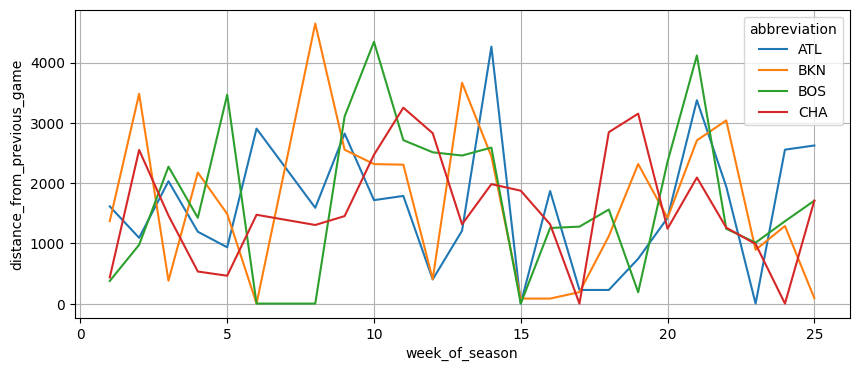

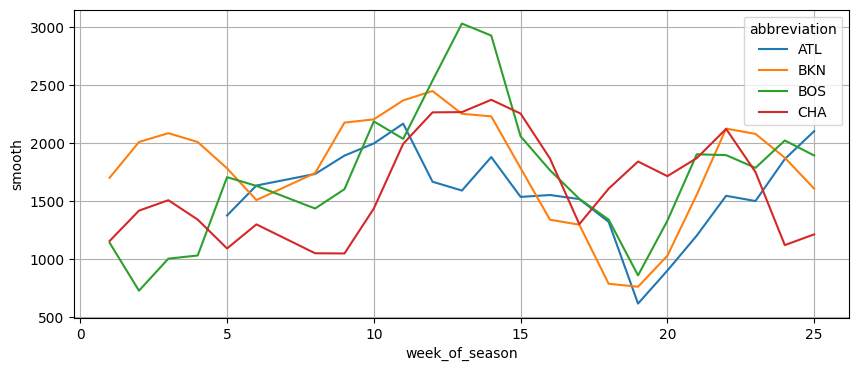

In [31]:
# travel by week for each team

travel_by_week = df.pivot_table(
    index=["abbreviation", 'week_of_season'],
    values=['distance_from_previous_game'],
    aggfunc=sum
).reset_index()

travel_by_week['smooth'] = travel_by_week["distance_from_previous_game"].rolling(5).mean()

temp = travel_by_week[travel_by_week['abbreviation'].isin(travel_by_week['abbreviation'].unique().tolist()[:4])]

plt.figure(figsize=(10,4))
sns.lineplot(x="week_of_season", y="distance_from_previous_game", data=temp, hue="abbreviation", markers='o')
plt.grid()

plt.figure(figsize=(10,4))
sns.lineplot(x="week_of_season", y="smooth", data=temp, hue="abbreviation", markers='o')
plt.grid()


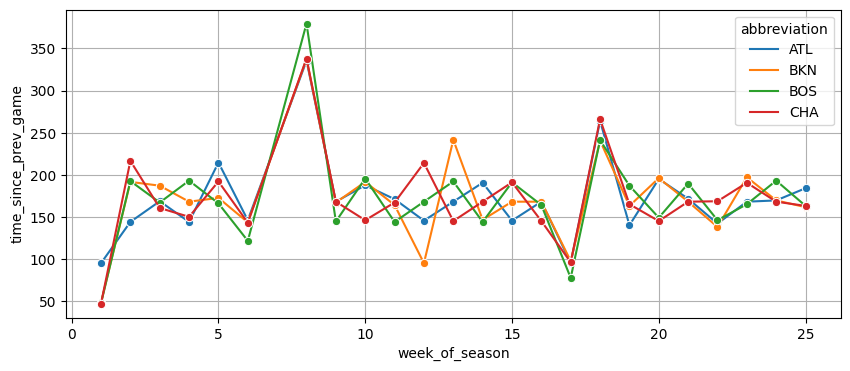

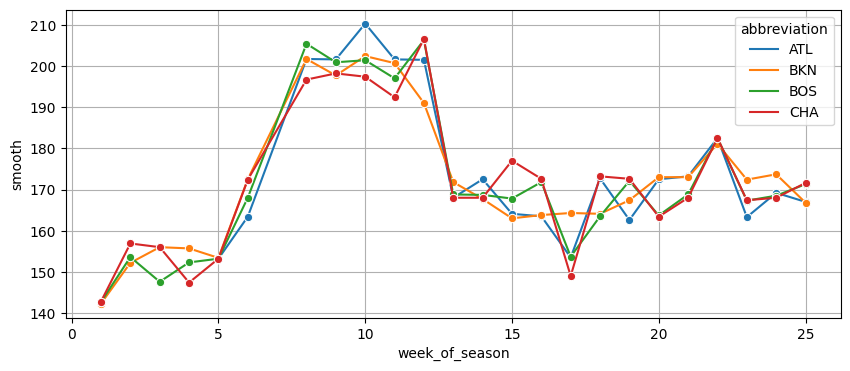

In [17]:
# rest by week
# travel by week for each team

vars = ["time_since_prev_game"]
temp = df.pivot_table(
    index=["abbreviation", 'week_of_season'],
    values=vars,
    aggfunc="sum"
).reset_index()

temp['smooth'] = temp[vars[0]].rolling(5).mean()

temp = temp[temp['abbreviation'].isin(temp['abbreviation'].unique().tolist()[:4])]

plt.figure(figsize=(10,4))
sns.lineplot(x="week_of_season", y=vars[0], data=temp, hue="abbreviation", marker='o')
plt.grid()

plt.figure(figsize=(10,4))
sns.lineplot(x="week_of_season", y="smooth", data=temp, hue="abbreviation", marker='o')
plt.grid()


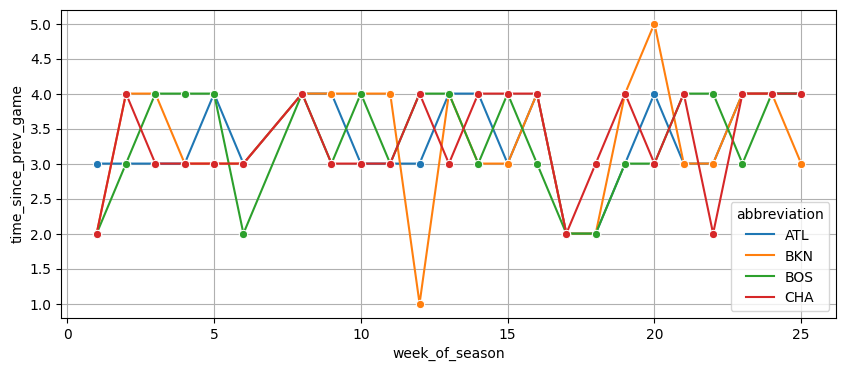

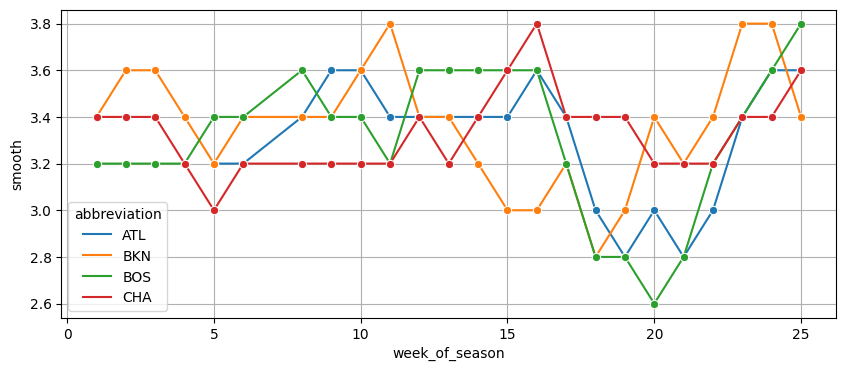

In [18]:
# games per week
# rest by week
# travel by week for each team

vars = ["time_since_prev_game"]
temp = df.pivot_table(
    index=["abbreviation", 'week_of_season'],
    values=vars,
    aggfunc="count"
).reset_index()

temp['smooth'] = temp[vars[0]].rolling(5).mean()

temp = temp[temp['abbreviation'].isin(temp['abbreviation'].unique().tolist()[:4])]

plt.figure(figsize=(10,4))
sns.lineplot(x="week_of_season", y=vars[0], data=temp, hue="abbreviation", marker='o')
plt.grid()

plt.figure(figsize=(10,4))
sns.lineplot(x="week_of_season", y="smooth", data=temp, hue="abbreviation", marker='o')
plt.grid()


In [ ]:
# jetlag (timezone changes) (hours lost vs hours gained)

# number of back-to-backs
#

In [10]:
# number of 4 in 5 sets by season

# number of 5 in 7 sets by season

# number of back-to-backs by season

In [11]:
plt.figure(figsize=(8,5))
# temp_df = df
temp_df = df[
    (df['team_abbreviation'] == "GSW")
    # & (df['season_start_year'] == 2018)
#     (df['cumulative_distance'] > 3000)
#     & (df['incoming_away_game_streak'] > 2)
]
sns.regplot(x = "cumulative_distance", y="point_difference", data=temp_df, line_kws={"color":"red"})
plt.grid()


KeyError: 'team_abbreviation'

<Figure size 800x500 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,5))


sns.countplot(x = "incoming_away_game_streak", hue="WL", data=temp_df)
plt.grid()


In [ ]:
temp_df = df[df['team_abbreviation'] == "ATL"]
print(temp_df.shape)
temp_df.head()